In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats import weightstats as stests
from statsmodels.stats.proportion import proportions_ztest

from warnings import filterwarnings
filterwarnings('ignore')  


## Problem Statement 1

**Load fifa dataset**

In [136]:
df = pd.read_csv('fifa_stats.csv')

df.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


**Info about columns**

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      2000 non-null   object 
 1   Age                       2000 non-null   int64  
 2   Nationality               2000 non-null   object 
 3   Overall_rating            2000 non-null   int64  
 4   Potential                 2000 non-null   int64  
 5   Club                      1981 non-null   object 
 6   Preferred Foot            2000 non-null   object 
 7   International Reputation  2000 non-null   int64  
 8   Weak Foot                 2000 non-null   int64  
 9   Skill Moves               2000 non-null   int64  
 10  Work Rate                 2000 non-null   object 
 11  Position                  2000 non-null   object 
 12  Jersey Number             2000 non-null   int64  
 13  Height                    2000 non-null   float64
 14  Weight  

**Descriptive Statistics**

In [139]:
df.describe()

,Age,Overall_rating,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,Weight
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,27.231500,78.197000,80.303500,1.774500,3.204000,2.919500,15.205500,5.781042,169.478000
std,3.859061,3.285969,4.114104,0.811775,0.728457,0.964098,13.210508,0.443337,16.050306
min,17.000000,75.000000,75.000000,1.000000,1.000000,1.000000,1.000000,5.083333,123.000000
25%,24.000000,76.000000,77.000000,1.000000,3.000000,2.000000,7.000000,5.500000,159.000000
50%,27.000000,77.000000,80.000000,2.000000,3.000000,3.000000,12.000000,6.000000,170.000000
75%,30.000000,80.000000,83.000000,2.000000,4.000000,4.000000,20.000000,6.166667,181.000000
max,41.000000,94.000000,95.000000,5.000000,5.000000,5.000000,99.000000,6.583333,227.000000


**Data cleaning : Null-imputation**

In [140]:
df.isna().sum()

Name                         0
Age                          0
Nationality                  0
Overall_rating               0
Potential                    0
Club                        19
Preferred Foot               0
International Reputation     0
Weak Foot                    0
Skill Moves                  0
Work Rate                    0
Position                     0
Jersey Number                0
Height                       0
Weight                       0
dtype: int64

In [141]:
df1 = df.copy()

df1.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


In [142]:
df1['Club'].dtype

dtype('O')

In [143]:
df1['Club'].isnull().sum() # Total 19 null values presnt in the column club and overall dataframe

19

In [144]:
df1['Club'].nunique() # There are total 285 unique values for column club .

285

In [145]:
df1['Club'].mode()  # max occurance of this column 

0    Chelsea
dtype: object

In [146]:
df1['Club'] = df1['Club'].fillna(df1['Club'].mode().iloc[0])  # fiiling null values with the mode

In [147]:
df1.isnull().sum().sum() # No null values are remaining

0

**a)	Assuming age as population, perform the central limit theorem with sample size of 200. Find the standard error and the mean of sampling distribution. Compare the results with population mean and standard deviation. Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size**

In [15]:
df1.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


In [148]:
len(df1['Age'])

2000

**Initially we take sample size of 200 for calculating the statistics.**

In [186]:
sample_age = df1['Age'].sample(n=200, random_state= 10)  # Taking sample of 200 point out of 2000 data points

In [187]:
n = len(sample_age)

n            # sample length

200

In [188]:
samp_mean = np.mean(sample_age)

samp_mean  # sample mean

26.86

In [189]:
samp_std = np.std(sample_age,ddof=1)

samp_std     # sample standard deviation

3.745737946495871

In [190]:
std_error = samp_std/np.sqrt(n)

std_error    # standard error of sampling distribution

0.26486367025150037

In [191]:
CI = 0.95      # Confidence Interval

In [192]:
pop_std = np.std(df1['Age'],ddof=1)

pop_std                 # population standard deviation

3.8590612753574423

In [193]:
interval = stats.norm.interval(CI, loc = samp_mean , scale = pop_std / np.sqrt(n))
print('Interval for 95% CI: ',interval)         # Estimated mean range from

Interval for 95% CI:  (26.325171222008237, 27.394828777991762)


In [194]:
pop_mean = np.mean(df1['Age'])

pop_mean

27.2315

In [195]:
# Difference of sample and population mean : standard error of mean

round (abs(pop_mean - samp_mean) ,2 )

0.37

In [196]:
# Difference of sample and population standard deviation


round( abs(pop_std - samp_std),2 )

0.11

**Now, we take sample size of 500 and try to fetch the similar statistics.**

In [197]:
len(df1['Age'])

2000

In [198]:
sample_age2 = df1['Age'].sample(n=500,random_state=10)  # Taking sample of 500 point out of 2000 data points

In [199]:
n2 = len(sample_age2)

n2            # sample length

500

In [200]:
samp_mean2 = np.mean(sample_age2)

samp_mean2  # sample mean

26.768

In [201]:
samp_std2 = np.std(sample_age2,ddof=1)

samp_std2     # sample standard deviation

3.7483698527634877

In [202]:
std_error2 = samp_std2/np.sqrt(n2)

std_error2    # standard error of sampling distribution

0.16763219591180073

In [203]:
# Difference between standard error with sample size 200 and 500

print('Diffrence between the standard error :' ,round((std_error - std_error2),4) )


Diffrence between the standard error : 0.0972


**We can see the standard error is more with less sample size and standard error is less for higher sample size.**
    
**We can see the downward trend for standard error by doing the below simulation .**
**Here we calcualte the standard error for sample size varying from 200 to 500 and plot the value.**

In [204]:
samps = np.arange(200,501,1)   # sample size list (200 to 500)

In [205]:
errors = []
for i in samps:
    samp_sd = np.std(df1['Age'].sample(n=i,random_state=10),ddof=1)
    sd_error = samp_sd/np.sqrt(i)
    errors.append(sd_error)
    

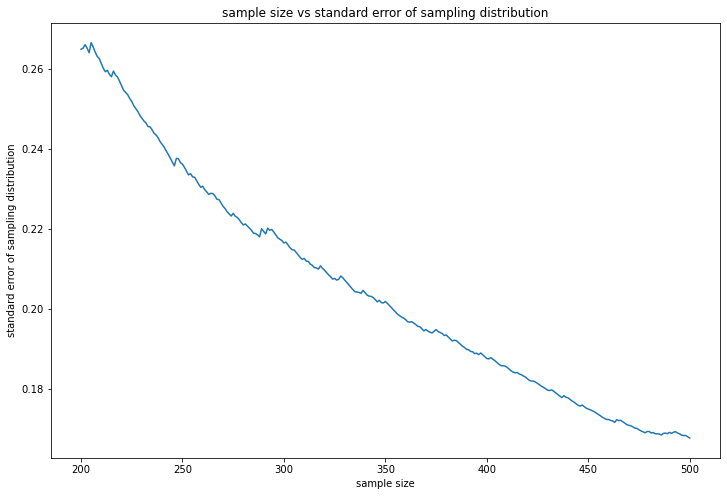

In [275]:
plt.figure(figsize=(12,8))
sns.lineplot(samps,errors)
plt.xlabel('sample size')
plt.ylabel('standard error of sampling distribution')
plt.title('sample size vs standard error of sampling distribution')
plt.show()

**1. a)**
 **Explanation : why the estimated standard error of a sample mean tends to decrease with an increase in sample size ?**
 
**Answer : we know that standard_error = population_std/ sqrt(sample_size).
 So , mathematically we can see they are inversely proportional, that is if sample size increases the standard error        decareses.**
 
 **In general , as the sample size gets closer to the actual population size , the the standard error gets reduced 
 and the sample mean takes closer approximate of the population mean .**



**b)	Is there any evidence that the players overall rating is greater than 80?**

In [208]:
df1.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


In [209]:
df['Overall_rating'].head()

0    94
1    94
2    92
3    91
4    91
Name: Overall_rating, dtype: int64

In [210]:
len(df['Overall_rating'])   # sample length is 2000 

2000

**Hypothesis:**

 **H0 : mu <= 80    # Overall rating <= 80**
 
 **Ha : mu > 80    # Overall Rating > 80**


In [211]:
sample_rating = df1['Overall_rating'].sample(n=200,random_state=10)  # Taking sample of 500 point out of 2000 data points

In [212]:
stats.shapiro(sample_rating)

ShapiroResult(statistic=0.8437209725379944, pvalue=2.1531867543285454e-13)

<AxesSubplot:xlabel='Overall_rating', ylabel='Density'>

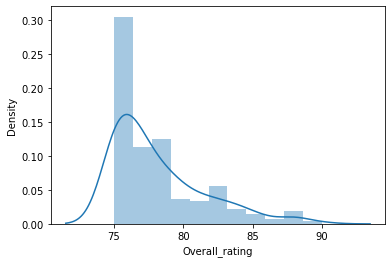

In [213]:
sns.distplot(sample_rating)

**Data is not normally distributed . We can't perform single sample z-test to test the claim.**

**Instead ,We perform range estimate to test the claim here.**

**Hypothesis:**

**H0 : mu <= 80    # Overall rating <= 80**

**Ha : mu > 80    # Overall Rating > 80**

In [214]:
n = 200
samp_mean = np.mean(sample_rating)
pop_std = np.std(df['Overall_rating'],ddof=1)

CI = 0.95

interval = stats.norm.interval(CI, loc= samp_mean, scale = pop_std/np.sqrt(n))
print('Range estimate with 95% CI:' , interval)

Range estimate with 95% CI: (77.68459635179413, 78.59540364820587)


**1. b)**
**Explanation:**

**As we can see from the range estimate , the claim is false . H0 holds true.**

**We conclude that , that the players overall rating is less or equal to 80.**

**c)	Perform the statistical test to identify whether preferred foot has any impact on potential. Also, perform the graphical analysis.**

In [215]:
df1.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


<AxesSubplot:xlabel='Preferred Foot', ylabel='Potential'>

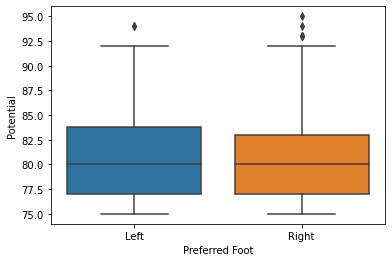

In [216]:
# boxplot 
sns.boxplot(df1['Preferred Foot'],df1['Potential'])

**As we can see from the boxplot, distribution of potential for both left and right foot player looks similar.**
**But we need to perform ANOVA for the statistical proof.**

**Hypothesis :**
**H0 : left foot player potential = right foot player potential.(preferred foot has no impact on potental )**

**Ha : left foot player potential != right foot player potential. (preffered foot has impact on potentail)**

In [217]:
df1['Preferred Foot'].unique()

array(['Left', 'Right'], dtype=object)

In [218]:
g1  = df1[df1['Preferred Foot']=='Left']['Potential'].sample(n=100,random_state=10).to_numpy()

g2  = df1[df1['Preferred Foot']=='Right']['Potential'].sample(n=100,random_state=10).to_numpy()

In [219]:
stats.shapiro(g1+g2)
# Data is normally ditributed.

ShapiroResult(statistic=0.9755012392997742, pvalue=0.05905984342098236)

In [220]:
stats.levene(g1,g2)
# Both have equal variance.

LeveneResult(statistic=0.16307812271553165, pvalue=0.6867740388772614)

 **So , we can perform ANOVA here.**
**To check the effect of independent variable(prefeered foot) on dependent variable(potential).**

In [221]:
stats.f_oneway(g1,g2)

F_onewayResult(statistic=0.007623007623007624, pvalue=0.9305134706636334)

**1.c)**

**Explanation :**

**p-value of one way ANOVA > 0.05 ... H0 is not rejected.**

**So, preferred foot has no impact on potentail.**

**d)	Perform the statistical test to identify the relation between the overall rating and potential. [Assume both are continuous data points].**

In [222]:
df1.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


<AxesSubplot:xlabel='Overall_rating', ylabel='Potential'>

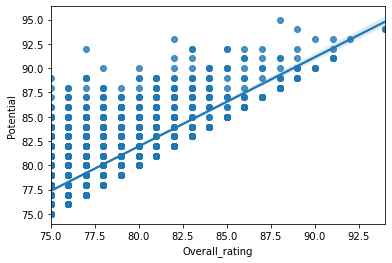

In [65]:
sns.regplot(df1['Overall_rating'],df1['Potential'])

 **As we can see from the regreesion plot, there is a postive co-relation between potential and overall rating.**
 
**But we need to perform person test to proof the claim.**

**H0: No relation between rating and potential.**

**Ha: relationship present between rating and potential.**

In [223]:
corr_coeff, p_value = stats.pearsonr(g1,g2)

corr_coeff

-0.03396186471126756

In [224]:
p_value

0.7372889816580229

**1.d)**

**Explanation :**

**As we can see form the result there is a positive co-relation between the two variables .**
**p-value< 0.05 ..H) is rejected . Ha holds true.**

**There is a significant correlation between overall rating and potential.**

**e)	Does skill move have any effect in overall rating. Perform the graphical analysis and the statistical analysis.**

In [225]:
df1.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


**H0 : overall ratings are same for all skill moves. (skill move has no effect on overall rating).**

**Ha : overall ratings are not same for all skill moves. (skill move has significant effect on overall rating).**

In [226]:
df1['Skill Moves'].unique()

array([4, 5, 1, 3, 2], dtype=int64)

<AxesSubplot:xlabel='Skill Moves', ylabel='Overall_rating'>

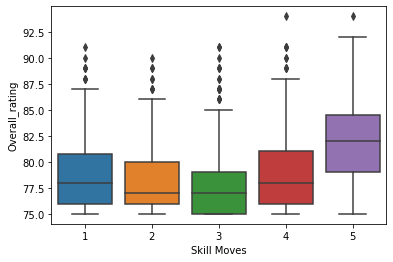

In [73]:
# boxplot 
sns.boxplot(df1['Skill Moves'],df1['Overall_rating'])

**As we can see from the boxplot,the distribution of overall ratinga re not equal among different skill moves.**

**But we need to perform ANOVA for the statistical proof.**

In [227]:
g1  = df1[df1['Skill Moves']==1]['Overall_rating'].to_numpy()

g2  = df1[df1['Skill Moves']==2]['Overall_rating'].to_numpy()

g3  = df1[df1['Skill Moves']==3]['Overall_rating'].to_numpy()

g4  = df1[df1['Skill Moves']==4]['Overall_rating'].to_numpy()

g5  = df1[df1['Skill Moves']==5]['Overall_rating'].to_numpy()

In [228]:
len(g1),len(g2),len(g3),len(g4),len(g5)

(194, 395, 828, 544, 39)

In [229]:
g1  = df1[df1['Skill Moves']==1]['Overall_rating'].sample(n=35,random_state=10).to_numpy()

g2  = df1[df1['Skill Moves']==2]['Overall_rating'].sample(n=35,random_state=10).to_numpy()

g3  = df1[df1['Skill Moves']==3]['Overall_rating'].sample(n=35,random_state=10).to_numpy()

g4  = df1[df1['Skill Moves']==4]['Overall_rating'].sample(n=35,random_state=10).to_numpy()

g5  = df1[df1['Skill Moves']==5]['Overall_rating'].sample(n=35,random_state=10).to_numpy()

In [230]:
stats.shapiro(g1+g2+g3+g4+g5)

# sampled data is normally distributed

ShapiroResult(statistic=0.963137686252594, pvalue=0.28341156244277954)

In [231]:
stats.levene(g1,g2,g3,g4,g5)

# sampled data has equal variance.

LeveneResult(statistic=1.548875509119887, pvalue=0.19030224505199667)

In [232]:
stats.f_oneway(g1,g2,g3,g4,g5)

F_onewayResult(statistic=8.81263647449168, pvalue=1.7261025608513861e-06)

**1. e)**

**Explanation :**

**p_value < 0.05..H0 is rejected.**

**So, Skill move has significant effect on overall rating.**

# Problem Statement 2

**load mobile network datset**

In [234]:
mn = pd.read_csv('phone.csv')

mn.head()

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile


**Info about columns**

In [235]:
mn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          820 non-null    object 
 1   duration      820 non-null    float64
 2   item          820 non-null    object 
 3   month         820 non-null    object 
 4   network       820 non-null    object 
 5   network_type  820 non-null    object 
dtypes: float64(1), object(5)
memory usage: 38.6+ KB


**Descriptive statistics**

In [236]:
mn.describe()

,duration
count,820.000000
mean,144.304936
std,45.687777
min,0.993514
25%,112.916486
50%,144.179434
75%,175.932308
max,268.458090


In [237]:
mn.isna().sum() 

# no null value is presnet in any of the column , so no data-cleaning is necessary.

date            0
duration        0
item            0
month           0
network         0
network_type    0
dtype: int64

**a) With 95% & 99% Confidence Interval find the range estimate of average duration calls made by all the network. Which of the Intervals are wider? Interpret the results.**

In [238]:
mn.head()

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile


In [239]:
mn['network'].unique() # Total 7 categories present for network. 

array(['data', 'Vodafone', 'Meteor', 'Tesco', 'Three', 'voicemail',
       'landline'], dtype=object)

In [240]:
sample_duration = mn['duration'].sample(n=200,random_state=10)

In [241]:
len(sample_duration)

200

In [242]:
samp_mean = np.mean(sample_duration)

samp_mean

144.77048937450002

In [243]:
pop_std = np.std(mn['duration'],ddof=1)

pop_std

45.68777682571285

In [244]:
CI =0.95

In [245]:
interval = stats.norm.interval(CI, loc = samp_mean , scale = pop_std / np.sqrt(n))
print('Range Estimatefor 95% CI: ',interval)         # Estimated mean range from

Range Estimatefor 95% CI:  (138.43860291162102, 151.10237583737901)


In [246]:
CI2 = 0.99

In [248]:
interval2 = stats.norm.interval(CI2, loc = samp_mean , scale = pop_std / np.sqrt(n))
print('Range Estimate for 99% CI: ',interval2)

Range Estimate for 99% CI:  (136.4489799863284, 153.09199876267164)


In [249]:
print('First interval range difference :',interval[1]- interval[0])

First interval range difference : 12.663772925757996


In [250]:
print('Second interval range difference :',interval2[1]- interval2[0])

Second interval range difference : 16.64301877634324


**So we can say that 99% CI is wider than 95% CI.**

**In general , A 99% confidence interval will be wider than a 95% confidence interval because to be more confident that the true population value falls within the interval we will need to allow more potential values within the interval.**

**b) Perform statistical analysis to check whether the networks are equally distributed in the dataset.**

In [251]:
mn['network'].unique()

array(['data', 'Vodafone', 'Meteor', 'Tesco', 'Three', 'voicemail',
       'landline'], dtype=object)

**To check if the  different categories are equally distributed or not we perform chi-square goodness of fit test.**

**H0 : all netowrks are equally distributed.**

**Ha : all networks are not equally distributed .**

In [252]:
mn['network'] = pd.Categorical(mn['network'])

In [253]:
mn['network'].dtype

CategoricalDtype(categories=['Meteor', 'Tesco', 'Three', 'Vodafone', 'data', 'landline',
                  'voicemail'],
                 ordered=False)

In [254]:
obs = mn['network'].value_counts().to_numpy()   

In [255]:
obs                     # Observed count for each categories .

array([215, 215, 150,  87,  84,  42,  27], dtype=int64)

In [256]:
x = len(mn['network'])/mn['network'].nunique()  


In [257]:
exp = np.array([1,1,1,1,1,1,1]) * x

exp                         # Expected count for each categories if they were eqaul in proportion.

array([117.14285714, 117.14285714, 117.14285714, 117.14285714,
       117.14285714, 117.14285714, 117.14285714])

In [258]:
stats.chisquare(obs,exp)

Power_divergenceResult(statistic=307.409756097561, pvalue=2.112592760257685e-63)

**As p_value < 0.05 .. H0 is rejected.**

**All networks are not equally distributed .**

**c) Plot the distribution of duration with respect to each network in the same graph and Interpret the results from the graph.**

<AxesSubplot:xlabel='network', ylabel='duration'>

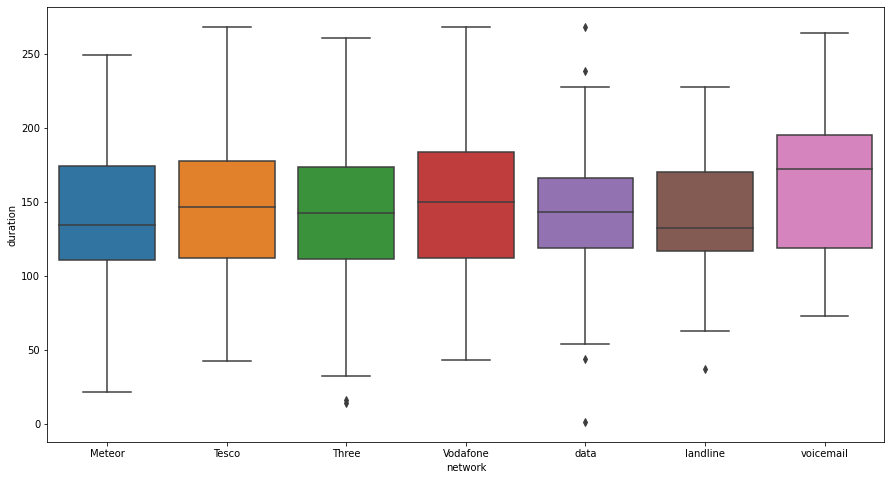

In [110]:
# Here we try to plot the distribution of duration for diffrent networks.  
plt.figure(figsize=(15,8))
sns.boxplot(mn['network'],mn['duration'])

**Observations :**

**The distribution of duration is no doubt different for different network.**

**voicemail duration is most widely didtributed among all networks.**

**Data duration is least widely distributed among all networks.**

**Tesco,three,vodafone and data these all are normally distributed.**

**Landline, voicemail and meteor are not normally distributed.**

**d)	Perform statistical tests to identify the relation between item and duration. Detailed explanation of relation between the classes is required.**

In [259]:
mn.shape

(820, 6)

In [260]:
mn.head()

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile


In [261]:
mn['item'].unique()

array(['data', 'call', 'sms'], dtype=object)

In [262]:
mn['item'] = pd.Categorical(mn['item'])

In [263]:
mn['item'].dtype

CategoricalDtype(categories=['call', 'data', 'sms'], ordered=False)

<AxesSubplot:xlabel='item', ylabel='duration'>

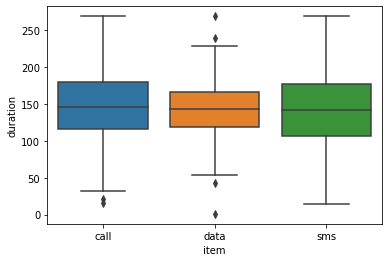

In [117]:
sns.boxplot(mn['item'],mn['duration'])

**From the boxplot we can infer that the average call durations are same for all the items.**

**To prove the claim we take help of ANOVA.**

 **Here if we want to test the relation between item and duration . we need to perform ANOVA.**

**H0 : avg duration for all item are same (no relation b/w item and duration).**

**Ha : avg duration for all item are not same ( relation  exists b/w item and duration).**

In [264]:
g1 = mn[mn['item']=='call']['duration'].to_numpy()
g2 = mn[mn['item']=='data']['duration'].to_numpy()
g3 = mn[mn['item']=='sms']['duration'].to_numpy()
len(g1),len(g2),len(g3)

(388, 150, 282)

In [265]:
# taking 100 samples for each

In [266]:
g1 = mn[mn['item']=='call']['duration'].sample(n=100,random_state=10).to_numpy()
g2 = mn[mn['item']=='data']['duration'].sample(n=100,random_state=10).to_numpy()
g3 = mn[mn['item']=='sms']['duration'].sample(n=100,random_state=10).to_numpy()

In [267]:
stats.shapiro(g1+g2+g3)

# sample is normalyy distributed

ShapiroResult(statistic=0.995317816734314, pvalue=0.9825014472007751)

In [268]:
stats.levene(g1,g2,g3)

# sample has eqaul variance

LeveneResult(statistic=1.2290797977165966, pvalue=0.294045321327679)

In [269]:
stats.f_oneway(g1,g2,g3)

F_onewayResult(statistic=0.19720592554442762, pvalue=0.8211289658546616)

**p-value > 0.05 ... H0 is not rejected..**

**There is no significant relation between items and duration , avg duration for all items are same.**

**e)	Perform statistical tests to identify the relation between network and network_type.**

In [270]:
mn.head()

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile


In [272]:
mn2 = pd.crosstab(mn['network'].sample(n=200,random_state=10),mn['network_type'].sample(n=200,random_state=10))
mn2

network_type,data,landline,mobile,voicemail
network,,,,
Meteor,0,0,24,0
Tesco,0,0,15,0
Three,0,0,47,0
Vodafone,0,0,55,0
data,43,0,0,0
landline,0,10,0,0
voicemail,0,0,0,6


**Here if weed need to check the dependency of diffrent network and diffrent network type.**
**We take help of chisquare test of independence.**

**H0 : categories are independent, no relations.**
**Ha : categories are not independent , relationship exists.**

In [273]:
chi2_stat,p_value,dof,expected_value = stats.chi2_contingency(mn2,correction=False)
p_value

8.60603056126397e-116

**p_value < 0.05 ..H0 is rejected. Ha holds true.**
**network and network type are dependent on each other.**